## Assigment
Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.

Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)


#### IDEA:
Does the gaussian model sensibly fit the distribution of age among Citibike riders?

#### NULL HYPOTHESIS:
The distribution of CitiBike riders by age is equal to that of a gaussian model, significance level p=0.05.

$H_0$ : R0 - R1 = 0

$H_1$ : R0 - R1 $\neq 0$

#### ALTERNATIVE HYPOTHESIS:
The distribution of CitiBike riders by age is not equal to that of a gaussian model, significance level p=0.05.

In [7]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import scipy.stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
os.getenv('PUI2016')
os.getenv('PUIDATA')

'/home/cusp/fhl204/PUIdata'

In [12]:
!curl -O 'https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32.9M  100 32.9M    0     0  37.3M      0 --:--:-- --:--:-- --:--:-- 46.6M


In [13]:
!unzip 201507-citibike-tripdata.zip

Archive:  201507-citibike-tripdata.zip
  inflating: 201507-citibike-tripdata.csv  


In [39]:
df = pd.read_csv('201507-citibike-tripdata.csv')

In [24]:
df = df[df.usertype != 'Customer']
#df.drop(['starttime', 'stoptime', 'start station name', 'end station name'], axis=1, inplace=True)
df['age'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')]
df['age'].dropna(inplace= True)
df_age = df['age']
df_age.describe()

count    905311.000000
mean         39.351615
std          11.440139
min          17.000000
25%          30.000000
50%          37.000000
75%          47.000000
max         131.000000
Name: age, dtype: float64

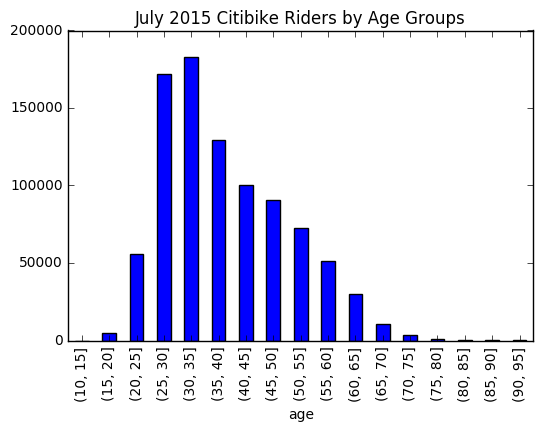

In [25]:
bins = np.arange(10, 99, 5)
ax = df_age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
ax.set_title("July 2015 Citibike Riders by Age Groups")

### scipy.stats.kstest

#### Perform the Kolmogorov-Smirnov test for goodness of fit.
This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). Under the null hypothesis the two distributions are identical, G(x)=F(x). The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’. The KS test is only valid for continuous distributions. 

In the one-sided test, the alternative is that the empirical cumulative distribution function of the random variable is “less” or “greater” than the cumulative distribution function F(x) of the hypothesis, G(x)<=F(x), resp. G(x)>=F(x).


### scipy.stats.anderson

#### Anderson-Darling test for data coming from a particular distribution
The Anderson-Darling test is a modification of the Kolmogorov-
Smirnov test `kstest` for the null hypothesis that a sample is
drawn from a population that follows a particular distribution.
For the Anderson-Darling test, the critical values depend on
which distribution is being tested against.  This function works
for normal, exponential, logistic, or Gumbel (Extreme Value
Type I) distributions.
Valid distributions: dist must be 'norm', 'expon', 'gumbel', 'extreme1' or 'logistic'.

If A2 is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected.  

In [27]:
scipy.stats.kstest(df['age'].values,'norm', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.10663088727174719, pvalue=0.0)

In [37]:
#test ad and ks. at normal distribution
print ("KS test: age on normal", scipy.stats.kstest(df_age,'norm'))
print ("AD test: age on normal", scipy.stats.anderson(df_age, dist='norm'))
print ("") 

KS test: age on normal KstestResult(statistic=1.0, pvalue=0.0)
AD test: age on normal AndersonResult(statistic=13805.856181447394, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



In [38]:
#test at other distributions
print ("KS test: age on poisson", scipy.stats.kstest(df_age,'poisson', args=(df.age.mean(), df.age.std())))
print ("AD test: age on expon", scipy.stats.anderson(df_age, dist='expon'))
print ("") 

KS test: age on poisson KstestResult(statistic=0.57392522699754978, pvalue=0.0)
AD test: age on expon AndersonResult(statistic=216340.95160200982, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



## Results

KS tests at normal and poisson distributions returned pvalue at 0.0, thus we reject the null hypothesis in both cases - the distribution of CitiBike riders by age does not equal that of a gaussian model.

AD tests at normal and exponential distributions returned statistic values greater than the critical values, thus we reject the null hypothesis in both cases - the distribution of CitiBike riders by age does not equal that of a gaussian model.